In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# 2. Load Dataset
df = pd.read_csv(r"C:\Users\biswa\classification_problem\loan_approval_pred\data\train.csv")


In [3]:
# 3. Encode Categorical Features
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [4]:

# 4. Scale Numerical Features
scaler = StandardScaler()
num_cols = ['person_age', 'person_income', 'person_emp_length',
            'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_cred_hist_length']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [5]:

# 5. Prepare Data
X = df.drop(['id', 'loan_status'], axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:

# 6. Train LightGBM Model
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)


C:\Users\biswa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\biswa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\biswa\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\biswa\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\biswa\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644


LGBMClassifier(random_state=42)

In [7]:

# 7. Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


 LightGBM Evaluation:
----------------------------------------
Accuracy : 0.9520845766902549
Precision: 0.9235474006116208
Recall   : 0.7233532934131737
F1 Score : 0.8112827400940228
ROC-AUC  : 0.9569391190776813

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.92      0.72      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



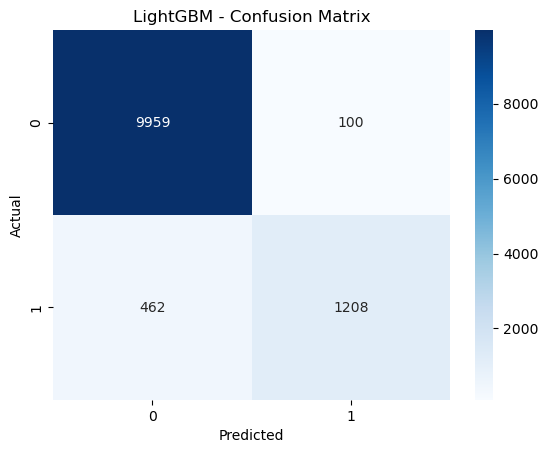

In [8]:


# 8. Evaluate
def evaluate_model(y_true, y_pred, y_prob, title="LightGBM"):
    print(f" {title} Evaluation:")
    print("-" * 40)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_prob))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_test, y_pred, y_prob)


In [10]:
import os

def save_result_to_csv(model_name, acc, prec, rec, f1, roc):
    result = pd.DataFrame([{
        'model_name': model_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'roc_auc': roc
    }])

    dir_path = r"C:\Users\biswa\classification_problem\loan_approval_pred\comparison_of_all"
    file_path = os.path.join(dir_path, "comparison.csv")

    os.makedirs(dir_path, exist_ok=True)

    if os.path.exists(file_path):
        result.to_csv(file_path, mode='a', header=False, index=False)
    else:
        result.to_csv(file_path, index=False)


In [11]:
save_result_to_csv(
    model_name="lgbm", 
    acc=accuracy_score(y_test, y_pred),
    prec=precision_score(y_test, y_pred),
    rec=recall_score(y_test, y_pred),
    f1=f1_score(y_test, y_pred),
    roc=roc_auc_score(y_test, y_prob)
)
